In [2]:
import numpy as np

import pandas as pd
import math

import matplotlib.pyplot as plt

dx = 0.2
dy = 0.2




df = pd.read_csv('csv/10x10/Voltatges.csv',index_col=False)
df = df.set_index('time')
df.head(5)


,Volt_0_0,Volt_0_1,Volt_0_2,Volt_0_3,Volt_0_4,Volt_0_5,Volt_0_6,Volt_0_7,Volt_0_8,Volt_0_9,...,Volt_9_0,Volt_9_1,Volt_9_2,Volt_9_3,Volt_9_4,Volt_9_5,Volt_9_6,Volt_9_7,Volt_9_8,Volt_9_9
time,,,,,,,,,,,,,,,,,,,,,
0,-85.1603,-85.1603,-85.1603,-85.1603,-85.1603,-85.1603,-85.1603,-85.1603,-85.1603,-85.1603,...,-86.2003,-86.2003,-86.2003,-86.2003,-86.2003,-86.2003,-86.2003,-86.2003,-86.2003,-86.2003
5,12.0823,12.0823,12.0823,12.0823,12.0823,12.0823,12.0823,12.0823,12.0823,12.0823,...,-86.2260,-86.2260,-86.2260,-86.2260,-86.2260,-86.2260,-86.2260,-86.2260,-86.2260,-86.2260
10,13.5457,13.5457,13.5457,13.5457,13.5457,13.5457,13.5457,13.5457,13.5457,13.5457,...,-86.1899,-86.1899,-86.1899,-86.1899,-86.1899,-86.1899,-86.1899,-86.1899,-86.1899,-86.1899
15,14.6840,14.6840,14.6840,14.6840,14.6840,14.6840,14.6840,14.6840,14.6840,14.6840,...,-86.1154,-86.1154,-86.1154,-86.1154,-86.1154,-86.1154,-86.1154,-86.1154,-86.1154,-86.1154
20,16.3917,16.3917,16.3917,16.3917,16.3917,16.3917,16.3917,16.3917,16.3917,16.3917,...,-84.2205,-84.2205,-84.2205,-84.2205,-84.2205,-84.2205,-84.2205,-84.2205,-84.2205,-84.2205


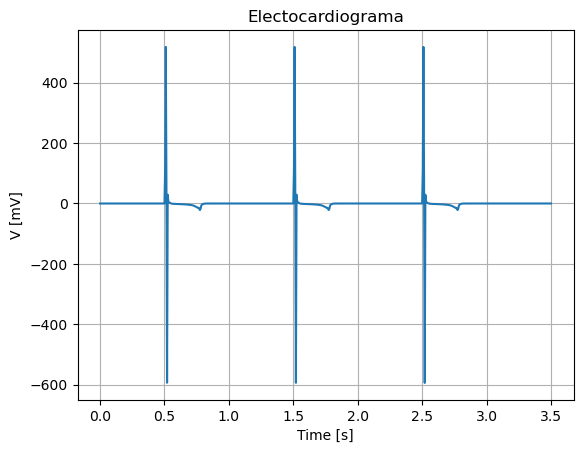

In [14]:

n_cells = 10
r1 = (n_cells/4,n_cells/2)
r2 = (n_cells/2,n_cells/2)
ECG1 = []
ECG2 = []
for row in df.iloc:
    M = np.reshape(list(row),(n_cells,n_cells))
    ECG_value1 = 0
    ECG_value2 = 0
    for i in range(1,n_cells-1):
        for j in range(1,n_cells-1):
            ECG_value1 += (M[i+1,j]+M[i-1,j]+M[i,j+1]+M[i,j-1]-4*M[i,j])/(0.1+ dx*dy*np.sqrt((dx*(r1[0]-i))**2+(dy*(r1[1]-j))**2))
            ECG_value2 += (M[i+1,j]+M[i-1,j]+M[i,j+1]+M[i,j-1]-4*M[i,j])/(0.1+ dx*dy*np.sqrt((dx*(r2[0]-i))**2+(dy*(r2[1]-j))**2))
    ECG1.append(ECG_value1)
    ECG2.append(ECG_value2)

ECG1 = np.array(ECG1)
ECG2 = np.array(ECG2)

plt.plot(df.index[:-100]/1000,ECG2[100:]-ECG1[100:])
plt.xlabel("Time [s]")
plt.ylabel("V [mV]")
plt.grid()
plt.title("Electrocardiogram")
plt.savefig("ECG_standart.png")



    

In [9]:
df.index

Index([   0,    5,   10,   15,   20,   25,   30,   35,   40,   45,
       ...
       3955, 3960, 3965, 3970, 3975, 3980, 3985, 3990, 3995, 4000],
      dtype='int64', name='time', length=801)